<a href="https://colab.research.google.com/github/Michael-Holland-Dev/CS180/blob/main/data_science_labs/data_science_lab_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BYU CS 180 Lab 10: Machine Learning with Scikit-Learn

In [101]:
# Dependencies for the lab
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

## Introduction:
Introduction:
Scikit-learn is a very popular library for machine learning in Python. You can think of it as an add-on to scipy/numpy with a very large number of implementations of common machine learning algorithms.

In general, the scikit-learn API can help you accomplish the following tasks:
* Preprocessing
* Dimensionality Reduction
* Clustering
* Classification
* Regression

Lab Objective:

Learn and become proficient at using different machine learning algorithms in the Scikit-Learn tool set.

For this lab you will need to create a number of plots where each point is given a different color. You can do this using matplotlib. The basic idea is you can create an array of colors and an array of indices

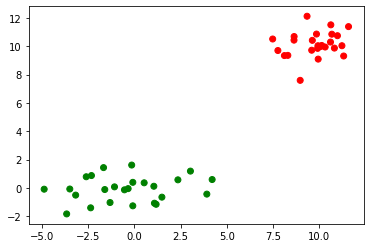

In [102]:
import matplotlib.pyplot as plt
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

n = 25

x1 = np.random.multivariate_normal([10, 10], cov=np.eye(2), size=n)
x1_idx = np.zeros(n, dtype=int)

x2 = np.random.multivariate_normal([0, 0], cov=np.array([[5, 0], [0, 1]]), size=n)
x2_idx = np.ones(n, dtype=int)

X = np.concatenate([x1, x2], axis=0)
X_idx = np.concatenate([x1_idx, x2_idx])

# create the plot and index into the colors array
plt.scatter(X[:, 0], X[:, 1], c=colors[X_idx])

## Exercise 1: Clusters!

In this exercise, you will train three different clustering algorithms on three different datasets. 

### Algorithms:
#### K-means 
* [Overview](https://scikit-learn.org/stable/modules/clustering.html#k-means)
* [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

#### DBScan: 

* [Overview](https://scikit-learn.org/stable/modules/clustering.html#dbscan)
* [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN)

#### GMM: 

* [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)

After reading the above documentation (You can skim it) attempt to explain to me like I'm five, what these algorithms are doing:
 

Explain how K-Means works?

Separates samples in n groups of equal variance, minimizes a criterion. The more samples, it gets more accuarte.

Explain how DBScan works?

Distinguish clusters based on the density of the area.



Explain how GMM works?

Get unobserved variables which is a categorical based on the observed variables.

#### Datasets:
We will generate three toy datasets using the scikit-learn api, which you can do with the following code:

In [103]:
from sklearn import datasets
np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)[0]
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)[0]
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]

This generates three datasets, `noisy_circles`, `noisy_moons`, and `blobs`

Your Task: 
* We want you to train each clustering algorithm on each dataset (you should have a total of 9 plots).
* For each dataset/algorithm, plot the points. Color the points using the cluster the belong to

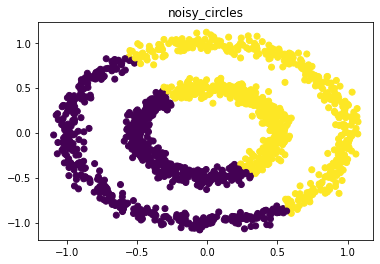

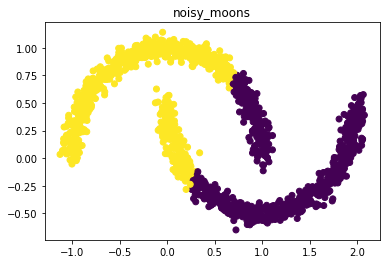

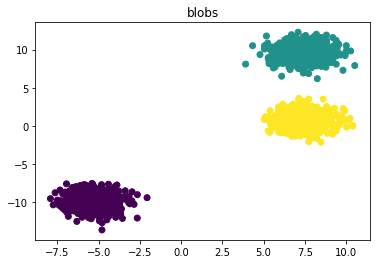

In [104]:
#Enter the code for exercise 1 here
#K-means
kmeans = KMeans(n_clusters=2, random_state=0, init="random").fit(noisy_circles)
plt.scatter(c = kmeans.labels_, x = noisy_circles[:,0], y = noisy_circles[:,1])
plt.title("noisy_circles")
plt.show()

kmeans = KMeans(n_clusters=2, random_state=0, init="random").fit(noisy_moons)
plt.scatter(c = kmeans.labels_, x = noisy_moons[:,0], y = noisy_moons[:,1])
plt.title("noisy_moons")
plt.show()

kmeans = KMeans(n_clusters=3, random_state=0, init="random").fit(blobs)
plt.scatter(c = kmeans.labels_, x = blobs[:,0], y = blobs[:,1])
plt.title("blobs")
plt.show()

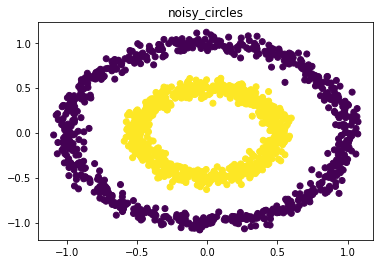

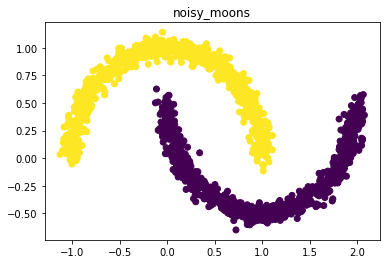

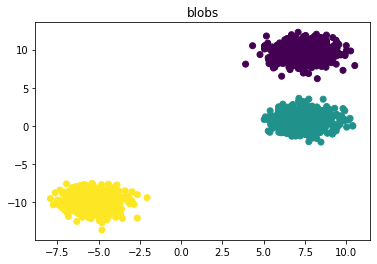

In [105]:
#Enter the code for exercise 1 here
#db scan
clustering = DBSCAN(eps=.15, min_samples=2).fit(noisy_circles)
plt.scatter(c = clustering.labels_, x = noisy_circles[:,0], y = noisy_circles[:,1])
plt.title("noisy_circles")
plt.show()

clustering = DBSCAN(eps=.2, min_samples=2).fit(noisy_moons)
plt.scatter(c = clustering.labels_, x = noisy_moons[:,0], y = noisy_moons[:,1])
plt.title("noisy_moons")
plt.show()

clustering = DBSCAN(eps=1.5, min_samples=3).fit(blobs)
plt.scatter(c = clustering.labels_, x = blobs[:,0], y = blobs[:,1])
plt.title("blobs")
plt.show()

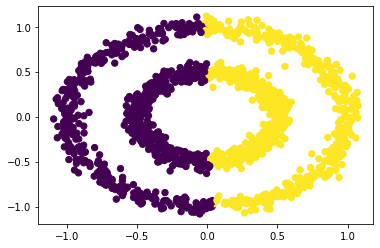

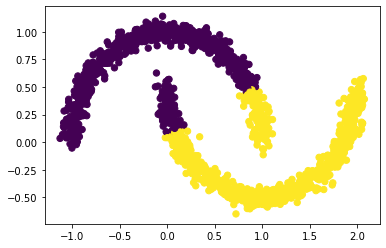

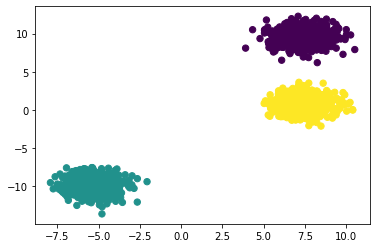

In [106]:
#Enter the code for exercise 1 here
#gmm
gmm = GaussianMixture(n_components=2).fit(noisy_circles)
labels = gmm.predict(noisy_circles)
plt.scatter(noisy_circles[:, 0], noisy_circles[:, 1], c=labels, s=40, cmap='viridis');
plt.show()

gmm = GaussianMixture(n_components=2).fit(noisy_moons)
labels = gmm.predict(noisy_moons)
plt.scatter(noisy_moons[:, 0], noisy_moons[:, 1], c=labels, s=40, cmap='viridis');
plt.show()

gmm = GaussianMixture(n_components=3).fit(blobs)
labels = gmm.predict(blobs)
plt.scatter(blobs[:, 0], blobs[:, 1], c=labels, s=40, cmap='viridis');
plt.show()

## Exercise 2: Flower Power Returns


In the previous exercise we looked simple datasets with 2 dimensions (features). In real life, we often have many more variables than. Clustering algorithms can also be applied to higher dimensional data. For this exercise train k-means on the Iris dataset, which has 4 dimensions (features). This is difficult visualize so we will also apply a dimensionality technique to the data to reduce to 2-D strictly to create a plot.

### Dataset
Download the iris dataset and cast to a numpy array

In [107]:
import statsmodels.api as sm
df = sm.datasets.get_rdataset(dataname='iris', package='datasets').data
X = df.iloc[:, :4].values

We know the iris dataset has three classes `['setosa', 'versicolor', 'virginica']`

Your Task: 
* Train K-means on the iris dataset with 3 clusters

In [108]:
from sklearn.cluster import KMeans
# your code goes here
kmeans = KMeans(n_clusters=3).fit_predict(X)
print(kmeans)
# clusters = get predicted clusters indices

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


Now let’s visualize the clusters by reducing the feature space to 2-D. This will allow us to create a plot. We will use T-distributed Stochastic Neighbor Embedding [sklearn.manifold.TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

In [109]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_reduced = tsne.fit_transform(X)

Your Task:
* Create a plot using X_reduced, where each point is colored according to its cluster id.

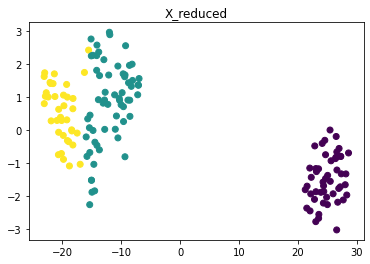

In [110]:
#Enter your code for the X_reduced plot here.
plt.scatter(X_reduced[:,0], X_reduced[:,1], c = kmeans)
plt.title("X_reduced")
plt.show()


Comment on your observations. Were we successfully able to group samples together without labels?

I think so.

## Exercise 3: Split the Data

Use the train_test_split() function in sklearn (sklearn.model_selection.train_test_split ) to split the iris data set. Report the number of samples in both the train and test set.

In [111]:
from sklearn.model_selection import train_test_split
#Split the dataset here
labels = df.iloc[:,4].values
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)
print(len(X_train))
print(len(X_test))

120
30


# What is the number of samples in the train set?

120

What is the number of samples in the test set?

30

## Exercise 4: K Nearest Neighbors

Your Task: 
* Train a K-nearest neighbors (sklearn.neighbors.KNeighborsClassifier ) on the iris data.

* Train your KNN when the n_neighbors parameter is 5. Report your train accuracy and test accuracy

* Perform a grid search over the parameter n_neighbors over the range 1-20:

* For each value of n_neighbors, fit a KNN and record your train and test accuracy

* Create a plot showing the test/train accuracy over the n_neighbors



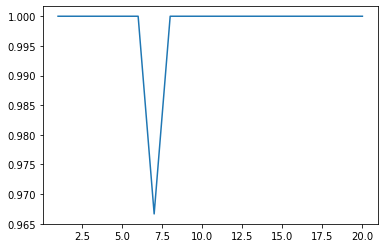

In [112]:
# Enter your code for Exercise 4 here
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy = []
for i in range(20):
    knn = KNeighborsClassifier(n_neighbors=i+1)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    score = accuracy_score(y_test, pred)
    accuracy.append(score)

plt.plot(range(1,21), accuracy)

What is your train accuracy and test accuracy for when the n_neighbors parameter is 5

100% don't ya see?

Discuss what you learn. How does train and test accuracy behave as you change the number of neighbors?

it changes around 7 which is interesting but oh well!